## Building Energy Efficiency Prediction

## Background
A construction company aiming to build greener and more energy-efficient structures wants to understand how architectural features like shape, surface area, orientation, and glazing affect energy usage.

## Problem Statement
Build a regression models to predict:
- Heating Load
- Cooling Load

based on the architectural features.

## Approach
1. Load and explore the dataset.
2. Perform Exploratory Data Analysis (EDA).
3. Build and evaluate regression models.
4. Interpret results and draw insights.

   - 768 samples
   - 8 features (architectural parameters)
   - 2 targets: Heating Load (Y1) and Cooling Load (Y2)


## Import Libraries and Load Dataset

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
 # Load the dataset
df = pd.read_csv('energy_efficiency_data.csv')
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Step 3: Understand the Dataset

In [3]:
# Check dataset shape and structure
print(f"Shape: {df.shape}")
df.info()

Shape: (768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
# Check for missing values
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [5]:
# Statistical summary
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Observation
- No missing values.
- 10 columns total: 8 features + 2 targets (Heating and Cooling Loads).
- All values are numeric.

## Step 4: Exploratory Data Analysis (EDA)

## Checking for outliers using boxplot

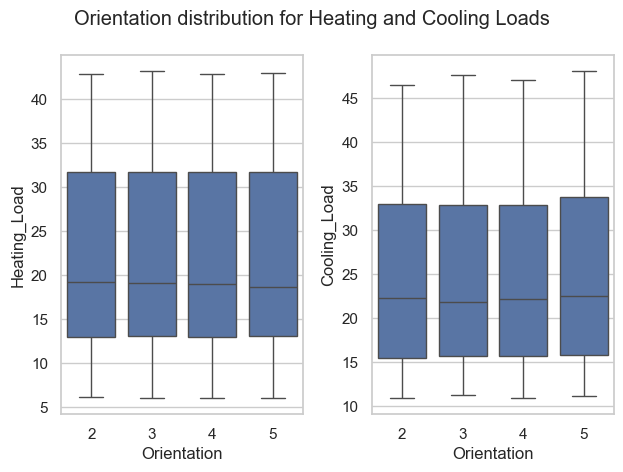

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.boxplot(ax=ax1, data= df, x='Orientation', y='Heating_Load')
sns.boxplot(ax=ax2, data= df, x='Orientation', y='Cooling_Load')
plt.suptitle('Orientation distribution for Heating and Cooling Loads')
plt.tight_layout()
plt.show()

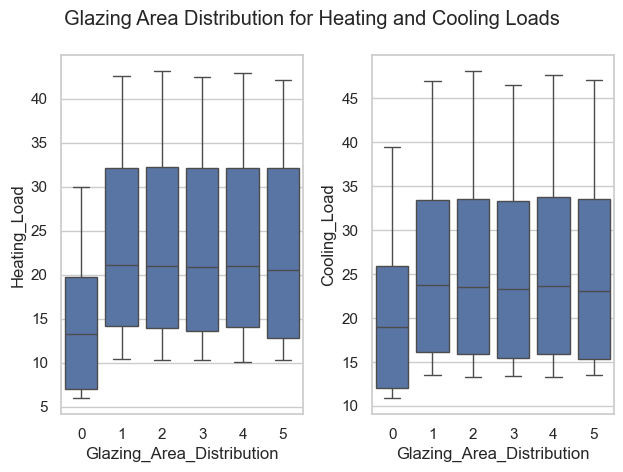

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.boxplot(ax=ax1, data= df, x='Glazing_Area_Distribution', y='Heating_Load')
sns.boxplot(ax=ax2, data= df, x='Glazing_Area_Distribution', y='Cooling_Load')
plt.suptitle('Glazing Area Distribution for Heating and Cooling Loads')
plt.tight_layout()
plt.show()

#### The plot shows that the features have no outliers

## Correlation Analysis between the architectural features using heatmap

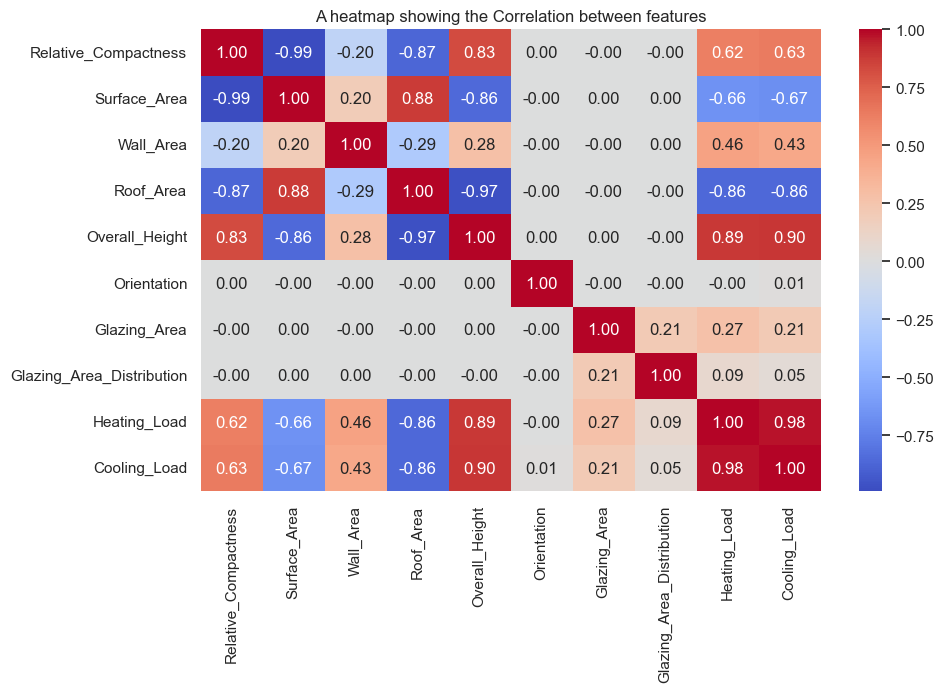

In [8]:
# Correlation heatmap
corr_matrix= df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', fmt='.2f')
plt.title('A heatmap showing the Correlation between features')
plt.show()

### Glazing Area

There appears to be a weak positive correlation between glazing area and cooling load. As the glazing area increases, the cooling load also increases. This means that buildings with more glass surfaces tend to have higher cooling demands. The larger the glass area, the more heat enters the building through solar gain, which in turn causes the air conditioning system to work harder to maintain comfortable indoor temperatures.

When there's more window surface, there's more opportunity for heat to escape the building. As a result, the heating system must work harder to compensate for this loss and maintain a comfortable indoor temperature.

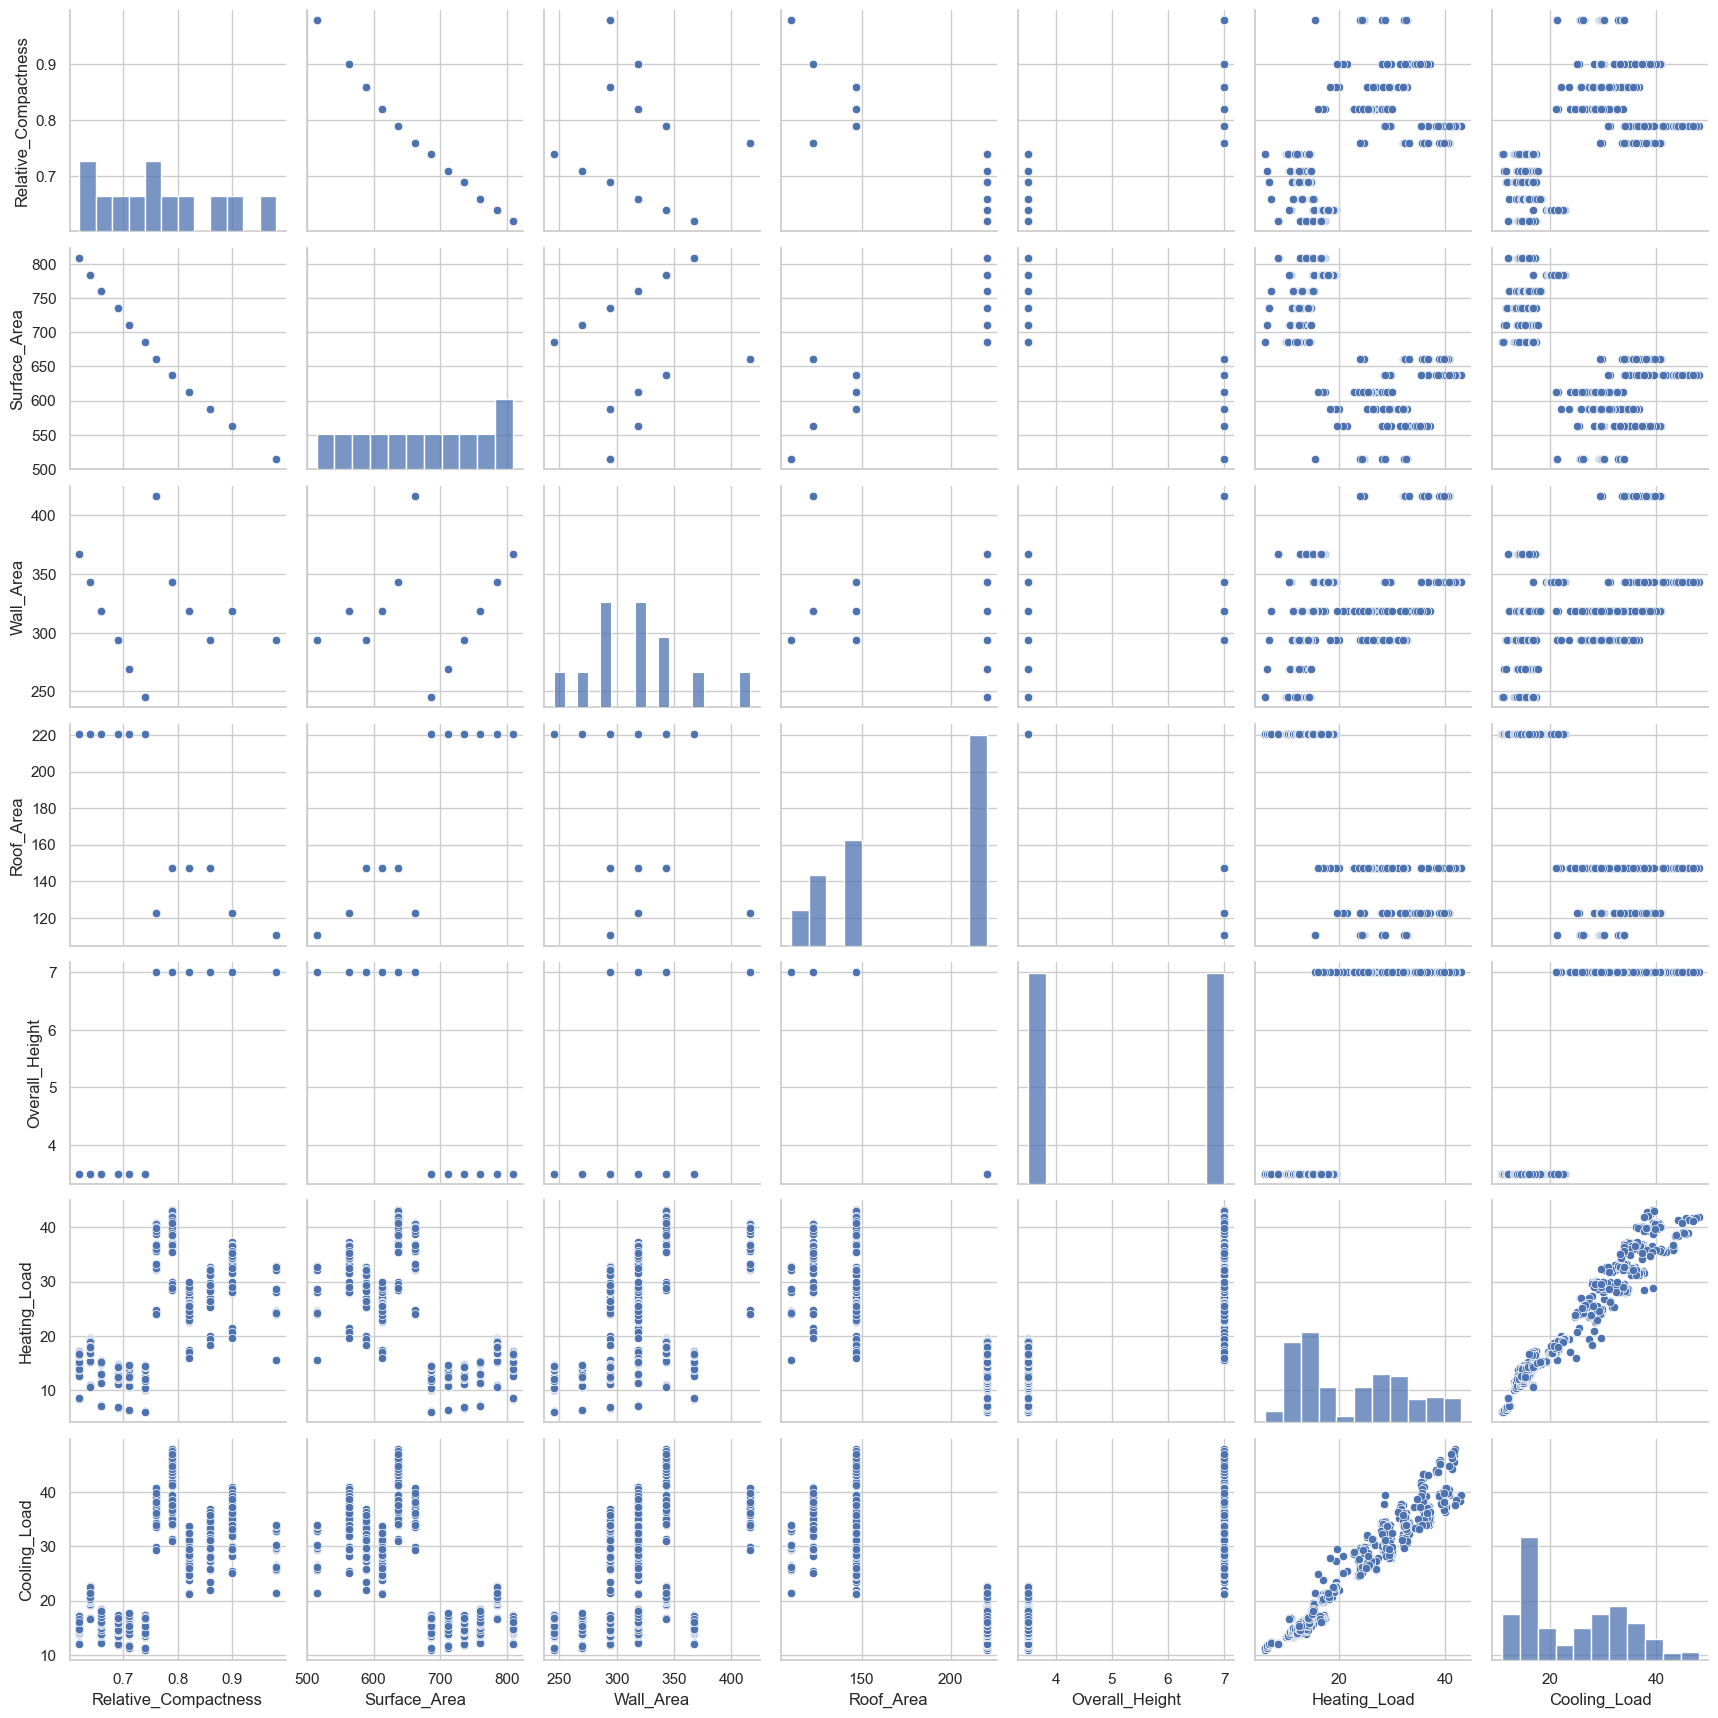

In [9]:
# Pairplot to explore variable relationships
sns.pairplot(df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 
                 'Roof_Area', 'Overall_Height', 'Heating_Load', 'Cooling_Load']])
plt.show()

# EDA Findings:
From the correlation values above, it is evident that the relationships between each feature and the target variables Heating Load and Cooling Load are quite similar.
Orientation, Glazing Area, and Glazing Area Distribution show low correlations with other features and also weak correlations with the energy loads. This suggests that these features are unlikely to significantly contribute to the model's predictive power (In the case of a linear regression that cannot handle multicollinearity).

Overall height is strongly correlated with Relative Compactness, Surface Area, and Roof area. It also demonstrates the strongest correlation with the energy loads. Models like random forest regression can handle multicollinearity by reducing the coefficients of correlated variables.

## Step 6: Data Preparation

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and targets
X=df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y=df[['Heating_Load', 'Cooling_Load']]  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Why standardize?
- Models like Linear Regression and KNN are sensitive to feature scales.
- Standardization brings all features to the same scale.

## Step 7: Model Training

In [11]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
lr= MultiOutputRegressor(LinearRegression())
lr.fit(X_train_scaled, y_train)
y_pred_lr= lr.predict(X_test_scaled)

In [12]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [13]:
# xgboost
from xgboost import XGBRegressor
xgb = MultiOutputRegressor(XGBRegressor(random_state=42))
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

## Models Used:
- Linear Regression: Simple, interpretable.
- Random Forest: Powerful, handles nonlinear relationship well.

## Step 8: Evaluate the Models on test set

In [14]:
# Create a list for results
results=[]

from sklearn.metrics import mean_squared_error, r2_score
def evaluate_multioutput(y_test, y_pred, model_name):
    for i, col in enumerate(y_test.columns):
        mse = mean_squared_error(y_test[col], y_pred[:, i])
        r2 = r2_score(y_test[col], y_pred[:, i])
        results.append({
            'Model': model_name,
            'Target Variables': col,
            'MSE': round(mse,2),
            'R2':  round(r2,2)
        })

evaluate_multioutput(y_test, y_pred_lr, 'Linear Regression')
evaluate_multioutput(y_test, y_pred_rf, 'Random Forest')
evaluate_multioutput(y_test, y_pred_xgb, 'XGBoost')

# display on table
result_df= pd.DataFrame(results)
result_by_target_variable = result_df.pivot_table(index='Target Variables', values=['MSE', 'R2'], columns='Model')
#result_df
result_by_target_variable

MSE                                      R2  \
Model            Linear Regression Random Forest XGBoost Linear Regression   
Target Variables                                                             
Cooling_Load                  9.89          2.98    0.74              0.89   
Heating_Load                  9.15          0.25    0.17              0.91   

                                        
Model            Random Forest XGBoost  
Target Variables                        
Cooling_Load              0.97    0.99  
Heating_Load              1.00    1.00

## Feature Importance with random forest regressor

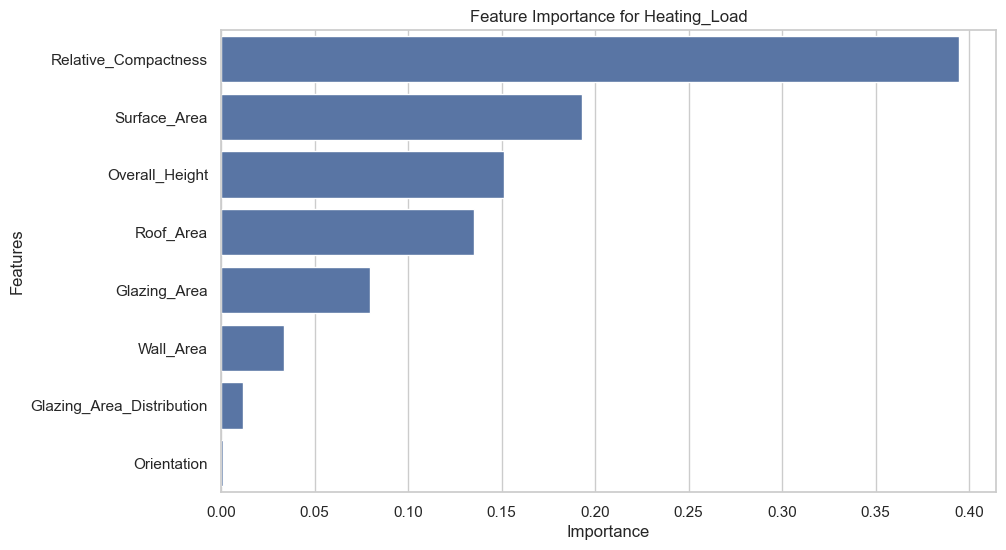

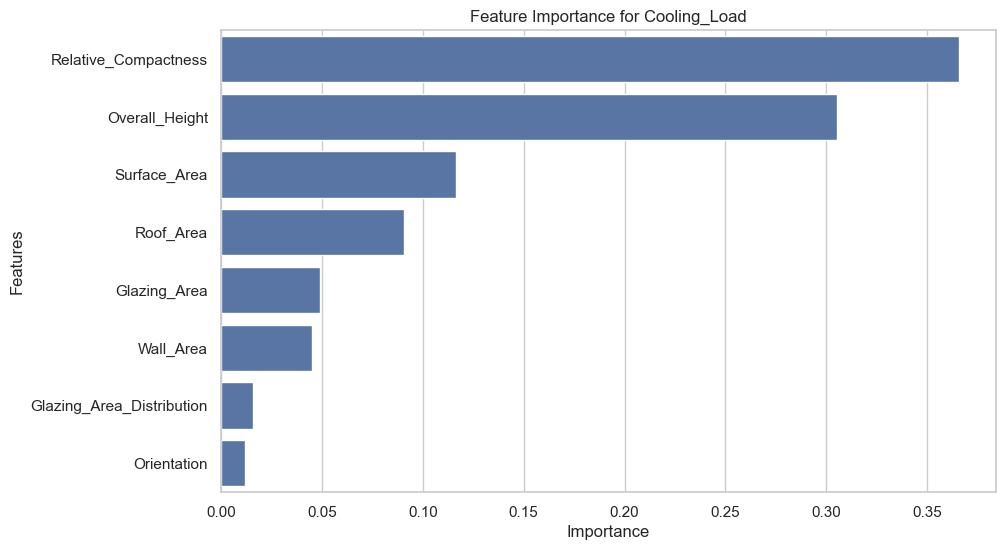

In [15]:
#importances = rf.feature_importances_
for i, col in enumerate (y_train.columns):
    importances = rf.estimators_[i].feature_importances_
    features = X.columns
    Importance_df = pd.DataFrame({
        'Features': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending = False).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(Importance_df, y= 'Features', x= 'Importance')
    plt.title(f'Feature Importance for {col}')
    plt.show()

## Feature Importance with XGBoost regressor

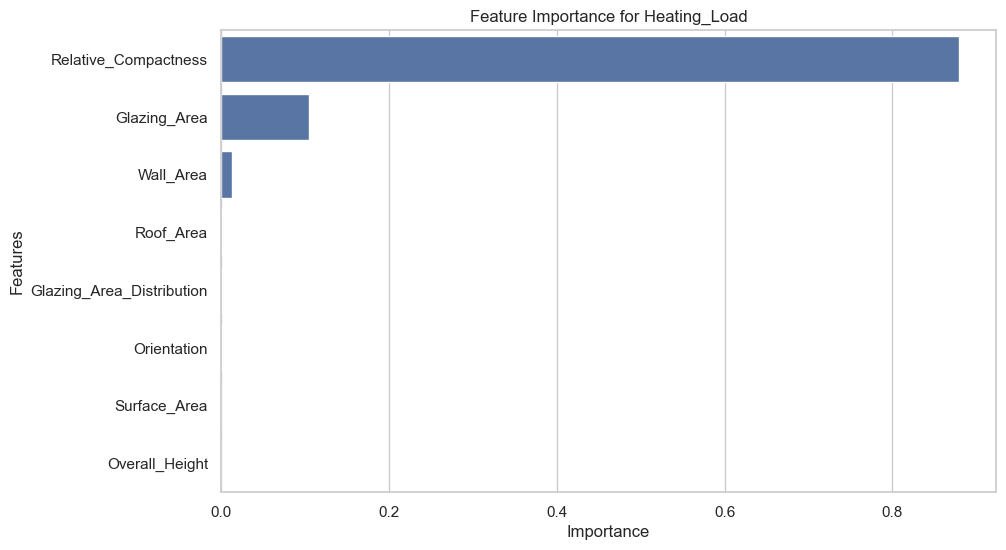

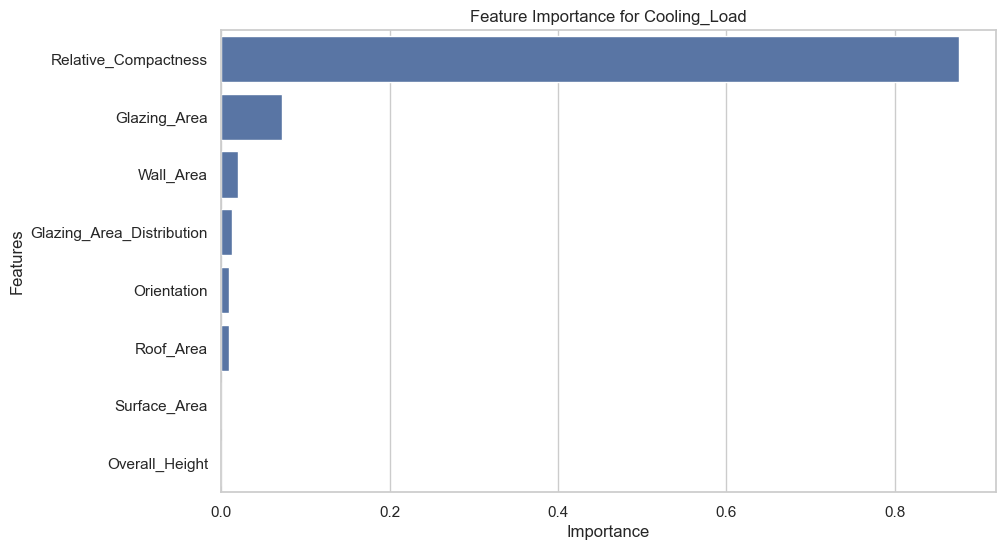

In [16]:
for i, col in enumerate (y_train.columns):
    importances = xgb.estimators_[i].feature_importances_
    features = X.columns
    Importance_df = pd.DataFrame({
        'Features': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending = False).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(Importance_df, y= 'Features', x= 'Importance')
    plt.title(f'Feature Importance for {col}')
    plt.show()

## Key Insights from the feature importance plots:

### Random Forest:

- *Key influential features for both energy loads*: Relative Compactness, Surface Area, Overall Height, Roof Area


### Xgboost:

- *Key influential features for both energy loads*: Relative Compactness, Glazing Area  (minimal)
- Design modifications to these can improve energy efficiency significantly.



## Conclusion

- Based on the analysis of different models, *Xgboost* outperformed both *Linear Regression* and *Random Forest* for both Heating and Cooling Load predictions.
- The feature importance plots across these models highlight a consistent insight: Relative Compactness emerges as a critical factor influencing energy consumption.
- Future building designs can be optimized by focusing on these dimensions.
- This model can serve as a decision-support tool for eco-friendly architectural planning.